이미지-Dence

In [69]:
import numpy as np
import pandas as pd

In [70]:
from tensorflow.keras.datasets import fashion_mnist, mnist

In [71]:
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, '5')

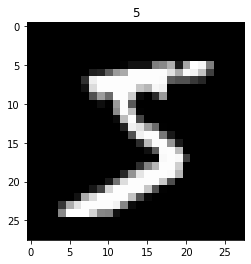

In [73]:
plt.imshow(train_images[0], cmap = 'gray')
plt.title(train_labels[0])

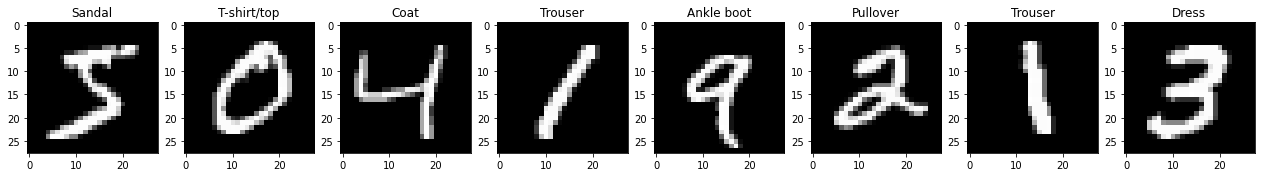

In [74]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
    
    
show_images(train_images[:8], train_labels[:8], ncols=8)

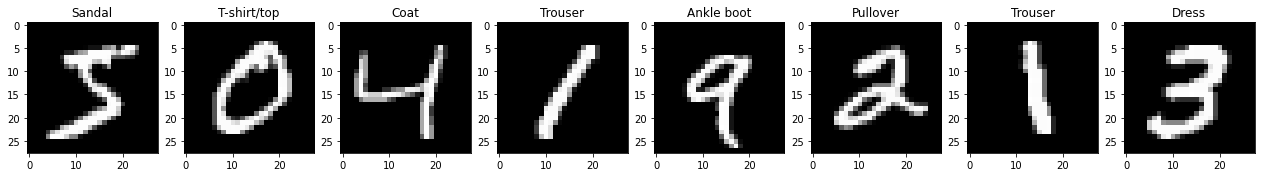

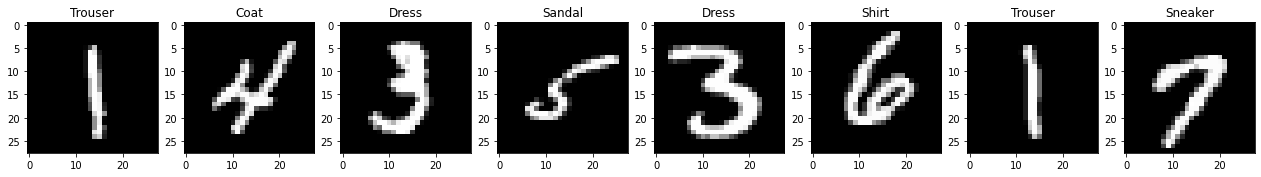

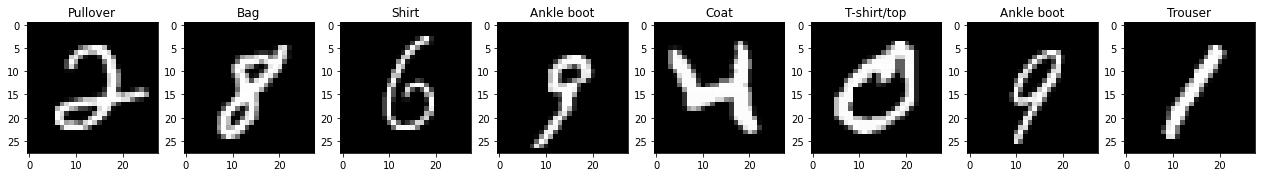

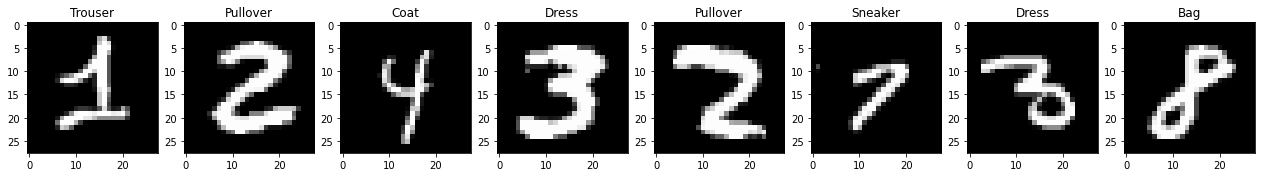

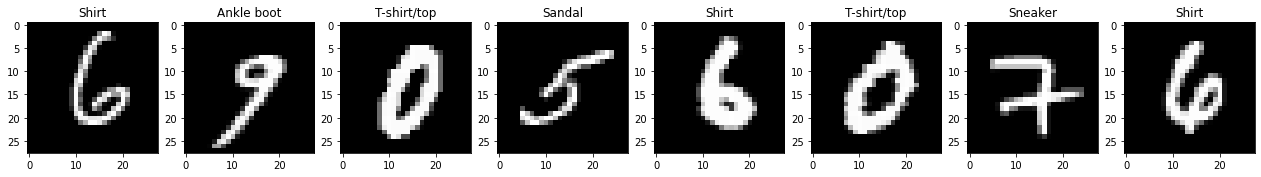

In [75]:
for x in range(5):
    show_images(train_images[x*8:x*8+8], train_labels[x*8:x*8+8], ncols=8)

In [76]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype = np.float32)
    labels = np.array(labels, dtype = np.float32)
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape: ",train_images.shape, train_labels.shape)
print("test dataset shape: ",test_images.shape, test_labels.shape)

train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


In [77]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [78]:
INPUT_SIZE = 28

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [79]:
model = Sequential([
    #Flatten = 2차원 ->1 차원
    Flatten(input_shape = (INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [80]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test__oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test__oh_labels.shape)

(60000, 10) (10000, 10)


In [82]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 1s 456us/step - loss: 0.4803 - accuracy: 0.8576
Epoch 2/20
1875/1875 [==============================] - 1s 434us/step - loss: 0.1201 - accuracy: 0.9632
Epoch 3/20
1875/1875 [==============================] - 1s 422us/step - loss: 0.0799 - accuracy: 0.9749
Epoch 4/20
1875/1875 [==============================] - 1s 423us/step - loss: 0.0596 - accuracy: 0.9818
Epoch 5/20
1875/1875 [==============================] - 1s 412us/step - loss: 0.0482 - accuracy: 0.9842
Epoch 6/20
1875/1875 [==============================] - 1s 427us/step - loss: 0.0385 - accuracy: 0.9876
Epoch 7/20
1875/1875 [==============================] - 1s 420us/step - loss: 0.0305 - accuracy: 0.9899
Epoch 8/20
1875/1875 [==============================] - 1s 427us/step - loss: 0.0257 - accuracy: 0.9915
Epoch 9/20
1875/1875 [==============================] - 1s 423us/step - loss: 0.0227 - accuracy: 0.9920
Epoch 10/20
1875/1875 [==============================] - 1s 428u

In [83]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.27111488580703735, 0.11414822936058044, 0.08156313002109528, 0.06208465248346329, 0.051863063126802444, 0.03961372375488281, 0.03423062711954117, 0.028688523918390274, 0.025404179468750954, 0.021439937874674797, 0.020544083788990974, 0.017973771318793297, 0.01607627421617508, 0.015070587396621704, 0.013202088885009289, 0.012451878748834133, 0.01283624954521656, 0.011122898198664188, 0.009802218526601791, 0.009463218040764332]
[0.920366644859314, 0.9648500084877014, 0.9749833345413208, 0.9805833101272583, 0.9833833575248718, 0.9872166514396667, 0.9887833595275879, 0.9906166791915894, 0.991599977016449, 0.9932166934013367, 0.992983341217041, 0.9940500259399414, 0.9947999715805054, 0.994700014591217, 0.9955666661262512, 0.9957166910171509, 0.9955166578292847, 0.9961000084877014, 0.9968166947364807, 0.9970499873161316]


In [84]:
pred_prova = model.predict(test_images)
print(pred_prova.shape)

(10000, 10)


In [85]:
pred_prova[0]

array([8.9319492e-18, 5.2205268e-17, 1.6820066e-18, 4.0034274e-13,
       6.2129842e-22, 2.3896213e-16, 8.8741209e-31, 1.0000000e+00,
       1.9069397e-16, 3.5562089e-09], dtype=float32)